In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


In [2]:
# Load the dataset
file_path = "data_vt.xlsx"  # Replace with your dataset path
df = pd.read_excel(file_path)

In [3]:
# Inspect the dataset
print("Dataset preview:")
print(df.head())

Dataset preview:
   Year  GEOID  STATEID           COUNTY  COUNTYID  TOT_POP  NHSP_POP  \
0  2016  17023       17     Clark County         1    16089     15862   
1  2016  17025       17      Clay County         2    13466     13284   
2  2016  17027       17   Clinton County         3    37858     36704   
3  2016  17029       17     Coles County         4    52802     51578   
4  2016  17033       17  Crawford County         5    19441     19026   

   HSP_POP  WHT_NHSP  BLK_NHSP  ...  APV_CVAP  TOT_VOT_REG  CREP_TOT_VOTE  \
0      227    155574        68  ...      9787         7928           1291   
1      182     12991        84  ...      8660         6350            810   
2     1154     34692      1271  ...     26532        17419           1235   
3     1224     48195      1928  ...     33163        21863           1432   
4      415     17714       814  ...     13392         8728            823   

   CDEM_TOT_VOTE   CWINNER  PDEM_TOT_VOT  PREP_TOT_VOT   PWINNER        CVT  \
0 

In [4]:
df.describe()

,Year,GEOID,STATEID,COUNTYID,TOT_POP,NHSP_POP,HSP_POP,WHT_NHSP,BLK_NHSP,AIA_NHSP,...,TOT_CVAP,BPV_CVAP,APV_CVAP,TOT_VOT_REG,CREP_TOT_VOTE,CDEM_TOT_VOTE,PDEM_TOT_VOT,PREP_TOT_VOT,CVT,PVT
count,180.000000,180.000000,180.0,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2019.333333,17105.000000,17.0,15.500000,29695.350000,28683.277778,1012.072222,24792.305556,3606.905556,158.850000,...,18881.711111,2975.238889,15907.027778,13674.983333,3065.516667,2994.927778,2386.111111,4422.894444,36.865460,34.808623
std,1.977527,58.563817,0.0,8.679585,45904.754952,43812.977911,2180.716012,30329.919903,13739.090271,352.832489,...,29987.120292,3378.441655,27580.339017,25088.156245,4769.881917,4452.074393,8410.169976,8294.217451,34.213844,39.890410
min,2016.000000,17023.000000,17.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1633.000000,339.000000,-4497.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,17049.000000,17.0,8.000000,10508.500000,10377.750000,162.500000,10107.000000,74.000000,18.000000,...,5281.500000,1060.500000,3949.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.500000,17094.000000,17.0,15.500000,16153.000000,15754.500000,441.000000,15369.500000,281.500000,62.000000,...,10781.000000,1870.500000,9100.500000,8662.000000,1018.500000,1340.000000,0.000000,0.000000,29.287965,0.000000
75%,2021.000000,17157.000000,17.0,23.000000,34684.000000,33817.500000,966.000000,32798.750000,1656.750000,160.000000,...,20860.500000,3186.250000,15413.500000,17407.750000,4379.000000,4060.750000,1588.000000,5790.250000,65.847399,69.457490
max,2022.000000,17199.000000,17.0,30.000000,265569.000000,255561.000000,17392.000000,165693.000000,79868.000000,2325.000000,...,198690.000000,22215.000000,192333.000000,197310.000000,29091.000000,25600.000000,68325.000000,57150.000000,107.375000,98.931579


In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Year             0
GEOID            0
STATEID          0
COUNTY           0
COUNTYID         0
TOT_POP          0
NHSP_POP         0
HSP_POP          0
WHT_NHSP         0
BLK_NHSP         0
AIA_NHSP         0
ASN_NHSP         0
MEDN_INC         0
MALE_POP         0
FEMALE_POP       0
TOT_CVAP         0
BPV_CVAP         0
APV_CVAP         0
TOT_VOT_REG      0
CREP_TOT_VOTE    0
CDEM_TOT_VOTE    0
CWINNER          0
PDEM_TOT_VOT     0
PREP_TOT_VOT     0
PWINNER          0
CVT              0
PVT              0
dtype: int64


# Model Preparing


In [6]:
# Drop the specified columns from the DataFrame
df_PWINNER = df.drop(columns=['CREP_TOT_VOTE', 'CDEM_TOT_VOTE', 'CWINNER','CVT','PWINNER','COUNTY','GEOID','COUNTYID','STATEID'])

# Drop rows where the year is 2019 or 2021
df_PWINNER = df_PWINNER[~df_PWINNER['Year'].isin([2018,2019,2021])]

# Display the new DataFrame
print(df_PWINNER.head())  # Show first few rows to verify


   Year  TOT_POP  NHSP_POP  HSP_POP  WHT_NHSP  BLK_NHSP  AIA_NHSP  ASN_NHSP  \
0  2016    16089     15862      227    155574        68        37        78   
1  2016    13466     13284      182     12991        84        80        42   
2  2016    37858     36704     1154     34692      1271       190       302   
3  2016    52802     51578     1224     48195      1928       269       683   
4  2016    19441     19026      415     17714       814       113       142   

   MEDN_INC  MALE_POP  FEMALE_POP  TOT_CVAP  BPV_CVAP  APV_CVAP  TOT_VOT_REG  \
0     48693      7670         886     12330      2543      9787         7928   
1     45984      6492         704     10370      1710      8660         6350   
2     63929     17982        2040     29535      3003     26532        17419   
3     38800     23782        2530     42505      9342     33163        21863   
4     47364      9053        1007     15455      2163     13392         8728   

   PDEM_TOT_VOT  PREP_TOT_VOT        PVT  
0

In [7]:
train_data = df_PWINNER[df_PWINNER['Year'] != 2022]  # Training data: years other than 2022
test_data = df_PWINNER[df_PWINNER['Year'] == 2022]   # Test data: only year 2022

In [8]:
df_PWINNER = df_PWINNER.drop(columns=['Year'])

Top 5 correlations with 'PVT' column:
PREP_TOT_VOT    0.334315
PDEM_TOT_VOT    0.190615
WHT_NHSP        0.151965
BPV_CVAP        0.141377
TOT_CVAP        0.093818
MEDN_INC        0.090450
APV_CVAP        0.085360
TOT_VOT_REG     0.049885
NHSP_POP        0.045135
TOT_POP         0.039541
Name: PVT, dtype: float64


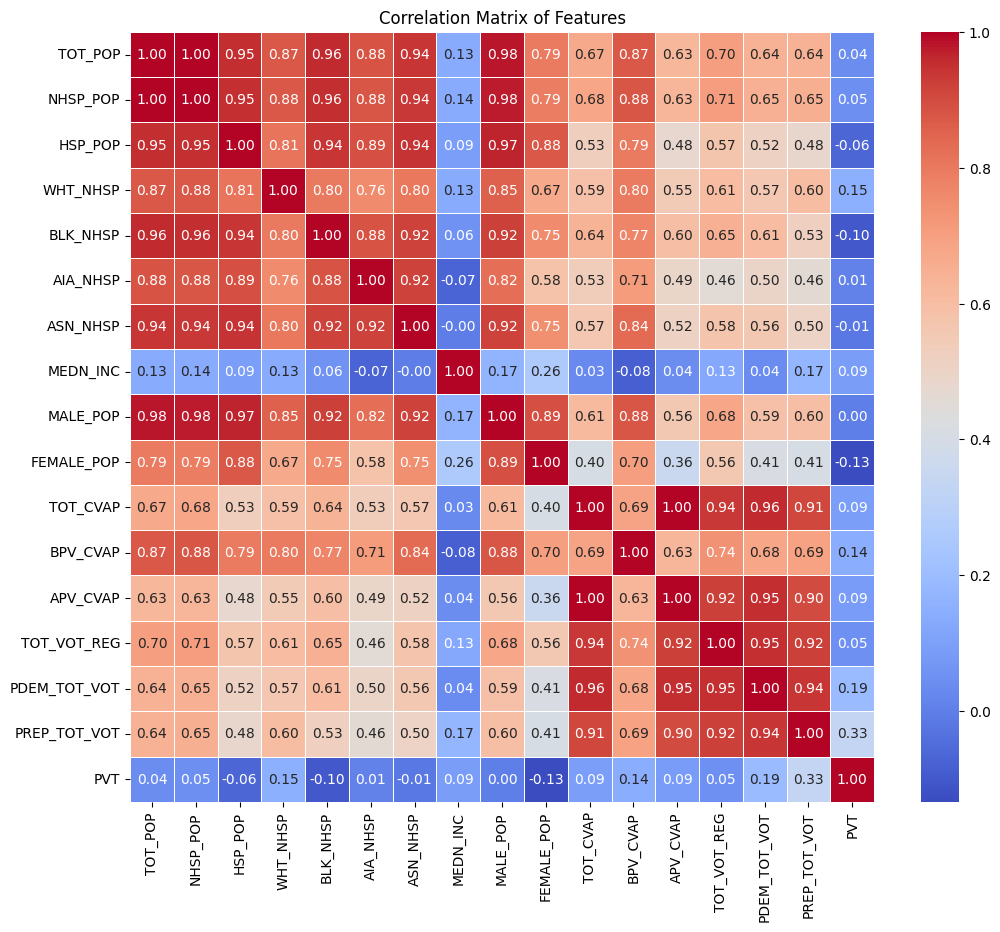

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is already loaded and preprocessed
# Replace 'df_CWINNER' with your actual DataFrame name if needed

# Step 1: Calculate the Correlation Matrix
correlation_matrix = df_PWINNER.corr()

# Step 2: Get the correlations with 'CVT' column
pvt_correlations = correlation_matrix['PVT']

# Step 3: Sort the correlations in descending order
top_5_correlation_with_pvt = pvt_correlations.drop('PVT').sort_values(ascending=False).head(10)

# Step 4: Print the top 5 correlations with the 'CVT' column
print("Top 5 correlations with 'PVT' column:")
print(top_5_correlation_with_pvt)

# Step 5: Plot the Correlation Matrix (Optional, for visualization)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [48]:
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the features based on correlations with 'PVT'
features_list = [
    'PREP_TOT_VOT',  # Correlation: 0.334315
    'PDEM_TOT_VOT',  # Correlation: 0.190615
    'WHT_NHSP',      # Correlation: 0.151965
    'BPV_CVAP',      # Correlation: 0.141377
    'TOT_CVAP',      # Correlation: 0.093818
    'MEDN_INC',      # Correlation: 0.090450
    'APV_CVAP',      # Correlation: 0.085360
    'TOT_VOT_REG',   # Correlation: 0.049885
    'NHSP_POP',      # Correlation: 0.045135
    'TOT_POP'        # Correlation: 0.039541
]

# Define the target variable (e.g., 'PVT')
target = 'PVT'

# Randomly select feature sets for training
n_iterations = 10  # Number of random feature sets to generate

# Loop over each random feature set
for i in range(1, n_iterations + 1):
    # Randomly sample 3 to 5 features for each iteration
    random_features = random.sample(features_list, random.randint(3, 5))

    # Prepare the data for the current feature set
    X_train = train_data[random_features]
    y_train = train_data[target]
    X_test = test_data[random_features]
    y_test = test_data[target]

    # Scale the features to improve linear regression model performance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Predict the target variable on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model performance using metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print out the evaluation metrics for this feature set
    print(f"Feature Set {i}: {random_features}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")

    # Optionally, print model coefficients to understand feature importance
    print(f"Model Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print("-" * 50)


Feature Set 1: ['APV_CVAP', 'NHSP_POP', 'TOT_VOT_REG', 'PREP_TOT_VOT', 'TOT_POP']
Mean Absolute Error (MAE): 14.670373642494656
Mean Squared Error (MSE): 2151.1707654744937
R-squared: -73.71411395350329
Model Coefficients: [ 10.10118421 -26.26243849 -80.55800184  80.89861925  25.09540576]
Intercept: 71.98063514740782
--------------------------------------------------
Feature Set 2: ['MEDN_INC', 'APV_CVAP', 'TOT_CVAP']
Mean Absolute Error (MAE): 13.319980831733963
Mean Squared Error (MSE): 354.3141786708853
R-squared: -11.305982558627482
Model Coefficients: [  5.9899457  -86.30705956  90.42067534]
Intercept: 71.98063514740782
--------------------------------------------------
Feature Set 3: ['NHSP_POP', 'BPV_CVAP', 'TOT_POP']
Mean Absolute Error (MAE): 11.167749164006114
Mean Squared Error (MSE): 322.4424350458047
R-squared: -10.199018330905716
Model Coefficients: [ 565.704952     12.89891876 -574.28435899]
Intercept: 71.98063514740781
--------------------------------------------------


In [ ]:
# # Select features and target variable
# features = ['TOT_POP', 'NHSP_POP', 'HSP_POP', 'WHT_NHSP', 'BLK_NHSP', 'MALE_POP', 'FEMALE_POP', 'TOT_CVAP','MEDN_INC','BPV_CVAP','APV_CVAP','AIA_NHSP','ASN_NHSP','TOT_VOT_REG','CREP_TOT_VOTE','CDEM_TOT_VOTE']
# target = 'CVT'

In [57]:
# Select features and target variable
features1 = ['TOT_POP','WHT_NHSP', 'TOT_CVAP','MEDN_INC','TOT_VOT_REG','PREP_TOT_VOT','PDEM_TOT_VOT','BPV_CVAP','APV_CVAP','NHSP_POP']
features2 = ['TOT_POP','WHT_NHSP', 'TOT_CVAP','MEDN_INC','TOT_VOT_REG','PREP_TOT_VOT','PDEM_TOT_VOT', 'NHSP_POP']
features3 = ['TOT_POP','WHT_NHSP', 'TOT_CVAP','MEDN_INC','TOT_VOT_REG','PREP_TOT_VOT','PDEM_TOT_VOT','APV_CVAP']
features4 = ['TOT_POP','WHT_NHSP', 'TOT_CVAP','MEDN_INC','TOT_VOT_REG','PREP_TOT_VOT','PDEM_TOT_VOT','BPV_CVAP']
features5 = ['TOT_POP','WHT_NHSP', 'TOT_CVAP','MEDN_INC','TOT_VOT_REG','PREP_TOT_VOT','PDEM_TOT_VOT']
features6 = ['WHT_NHSP','MEDN_INC','PREP_TOT_VOT','PDEM_TOT_VOT','APV_CVAP']
features7 = ['PREP_TOT_VOT','PDEM_TOT_VOT','TOT_CVAP']
features8 = ['TOT_CVAP','MEDN_INC','TOT_VOT_REG']
# ['TOT_CVAP', 'NHSP_POP', 'WHT_NHSP']
# ['TOT_POP', 'APV_CVAP', 'WHT_NHSP']
features9 = ['TOT_CVAP', 'NHSP_POP', 'WHT_NHSP','TOT_VOT_REG']
target = 'PVT'

In [60]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define feature sets
feature_sets = [
    features1,  # First set of features
    features2,  # Second set of features
    features3,  # Third set of features
    features4,
    features5,
    features6,
    features7,
    features8,
    features9
]

# Loop over each feature set
for i, features in enumerate(feature_sets, start=1):
    # Prepare the data for the current feature set
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    # # Scale the features to improve linear regression model performance
    # scaler = StandardScaler()
    # X_train_scaled = scaler.fit_transform(X_train)
    # X_test_scaled = scaler.transform(X_test)

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict the target variable (CT) on the test set (2022 data)
    y_pred = model.predict(X_test)

    # Evaluate the model performance using metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print out the evaluation metrics for this feature set
    print(f"Feature Set {i}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")

    # Optionally, print model coefficients to understand feature importance
    print(f"Model Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print("-" * 50)


Feature Set 1:
Mean Absolute Error (MAE): 19.123835719692746
Mean Squared Error (MSE): 3035.5822134712967
R-squared: -104.43134885086434
Model Coefficients: [-2.20544431e-03  7.30295201e-05 -6.34348695e-02 -1.08014009e-04
 -4.57951325e-03  6.92834985e-03  3.31950088e-03  6.18091696e-02
  6.33747183e-02  2.37552561e-03]
Intercept: 84.08942649800593
--------------------------------------------------
Feature Set 2:
Mean Absolute Error (MAE): 18.42156143527343
Mean Squared Error (MSE): 2661.8928140778344
R-squared: -91.45242927013967
Model Coefficients: [-2.64492171e-03  6.21843230e-05 -7.47694756e-05  7.86931509e-05
 -4.51387729e-03  6.43170089e-03  3.58850385e-03  2.76203183e-03]
Intercept: 74.64531854009446
--------------------------------------------------
Feature Set 3:
Mean Absolute Error (MAE): 19.51710671245793
Mean Squared Error (MSE): 3275.511429196037
R-squared: -112.76453143782595
Model Coefficients: [ 3.89461238e-05  7.78162939e-05 -1.74717184e-03 -1.62973265e-04
 -4.67753012e

# Random Forest

In [59]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define feature sets
feature_sets = [
    features1,  # First set of features
    features2,  # Second set of features
    features3,  # Third set of features
    features4,
    features5,
    features6,
    features7,
    features8,
    features9
]

# Loop over each feature set
for i, features in enumerate(feature_sets, start=1):
    # Prepare the data for the current feature set
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    # Scale the features to improve model performance (optional for RandomForest, but can help in some cases)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Predict the target variable (CT) on the test set (2022 data)
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model performance using metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print out the evaluation metrics for this feature set
    print(f"Feature Set {i}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")

    # Optionally, print feature importances to understand which features are most important
    print(f"Feature Importances: {model.feature_importances_}")
    print("-" * 50)


Feature Set 1:
Mean Absolute Error (MAE): 15.503825732184215
Mean Squared Error (MSE): 333.5605397155963
R-squared: -10.585170538149272
Feature Importances: [0.05880488 0.08091912 0.02188132 0.0304166  0.17087415 0.29468733
 0.18933582 0.03882433 0.03087033 0.08338613]
--------------------------------------------------
Feature Set 2:
Mean Absolute Error (MAE): 16.23632760868512
Mean Squared Error (MSE): 351.6502187495675
R-squared: -11.213458334924116
Feature Importances: [0.04670095 0.11085223 0.04004739 0.02757415 0.19341278 0.34324403
 0.18191599 0.05625247]
--------------------------------------------------
Feature Set 3:
Mean Absolute Error (MAE): 16.2787807841259
Mean Squared Error (MSE): 342.6440677033537
R-squared: -10.900658158225518
Feature Importances: [0.06193831 0.13110073 0.02167537 0.02892418 0.1868551  0.35162794
 0.18181586 0.0360625 ]
--------------------------------------------------
Feature Set 4:
Mean Absolute Error (MAE): 15.200349461992925
Mean Squared Error (MSE